## Data Collection using Kaggle API

In [1]:
!ls -lha kaggle.json

-rw-r--r--@ 1 manasak  staff    71B Jan 31 20:19 kaggle.json


The ls -lha kaggle.json command is a Linux command that lists the information about the file named "kaggle.json" in the long format, including hidden files, and in human-readable format for file sizes.

ls: is a command used to list the contents of a directory.
-l: option is used to display the contents of a directory in the long format, which includes information such as permissions, ownership, creation date, size, and file name.
-h: option is used to display file sizes in human-readable format (e.g., 1K, 234M, 2G, etc.)
-a: option is used to display hidden files, which are files that start with a dot (.).
kaggle.json: is the name of the file that the information is being displayed for.

In [2]:
!pip install -q kaggle

The pip install -q kaggle command is used to install the kaggle package using the Python package manager (pip). The -q option stands for "quiet" and suppresses any output that would normally be displayed during the installation process.

In this case, the kaggle package is a Python client for the Kaggle API that allows users to interact with Kaggle datasets and competitions, download files and submit entries directly from the command line.

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

The mkdir -p ~/.kaggle command creates a directory named .kaggle in the home directory (represented by ~/) of the current user.

mkdir is a command used to create a directory.
-p is an option that tells the mkdir command to create any parent directories that do not exist. For example, if the parent directory of .kaggle (~/) does not exist, it will be created.
~/ is a shorthand for the home directory of the current user.
.kaggle is the name of the directory being created. The . in front of the directory name indicates that it is a hidden directory in Linux.

The cp kaggle.json ~/.kaggle/ command is used to copy a file named "kaggle.json" to the .kaggle directory in the home directory (represented by ~/) of the current user.

cp is a command used to copy files or directories.
kaggle.json is the name of the file being copied.
~/.kaggle/ is the destination directory for the file, where it will be copied to. The ~/ represents the home directory of the current user and .kaggle is the name of the directory.

In [4]:
!chmod 600 /Users/manasak/.kaggle/kaggle.json

The chmod 600 ~/.kaggle/kaggle.json command is used to change the permissions of the file named kaggle.json located in the .kaggle directory in the home directory (represented by ~/) of the current user.

chmod is a command used to change the permissions of files and directories.
600 is the permissions setting for the file. In this case, 600 is an octal representation of the permissions, where each digit represents the permissions for the user (the owner), the group, and others, respectively. In this case, 600 means that the owner has read and write permissions (6 in binary is 110 which is rw- in the standard Unix permissions notation), while the group and others have no permissions (0 in binary is 000 which is --- in the standard Unix permissions notation).
~/.kaggle/kaggle.json is the file for which the permissions are being changed. The ~/ represents the home directory of the current user and .kaggle is the name of the directory containing the file, kaggle.json.

In [5]:
!pwd

/Users/manasak/Downloads/MS-Data Science/Semester 2/Machine Learning/MLProject


The pwd command stands for "print working directory" and it displays the path of the current working directory. When executed, it prints the absolute path of the current directory in which the user is located.

In [6]:
!kaggle competitions list

ref                                                                               deadline             category            reward  teamCount  userHasEntered  
--------------------------------------------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
https://www.kaggle.com/competitions/nfl-player-contact-detection                  2023-03-01 23:59:00  Featured          $100,000        654           False  
https://www.kaggle.com/competitions/godaddy-microbusiness-density-forecasting     2023-03-14 23:59:00  Featured           $60,000       2207           False  
https://www.kaggle.com/competitions/learning-equality-curriculum-recommendations  2023-03-14 23:59:00  Featured           $55,000        667           False  
https://www.kaggle.com/competitions/lux-ai-season-2                               2023-04-24 23:59:00  Featured           $55,000        114           False  
https://www.kaggle.com/competitions/rsna-breas

The kaggle competitions list command is used to list the available Kaggle competitions. It requires the Kaggle API to be installed and configured, as well as a valid Kaggle account. The output will be a table displaying information about each competition, such as its name, deadline, number of teams, and the prize pool.

Note that this command only works in a shell environment where the Kaggle API has been installed and the user has authorized their account by uploading the kaggle.json file.

In [7]:
!kaggle competitions download -c msk-redefining-cancer-treatment

100%|███████████████████████████████████████▊| 168M/169M [00:06<00:00, 23.5MB/s]
100%|████████████████████████████████████████| 169M/169M [00:06<00:00, 26.3MB/s]


The kaggle competitions download -c msk-redefining-cancer-treatment command is used to download the data for the Kaggle competition named "msk-redefining-cancer-treatment". It requires the Kaggle API to be installed and configured, as well as a valid Kaggle account.

kaggle competitions download is the command for downloading data for a Kaggle competition.
-c msk-redefining-cancer-treatment is the option and argument to specify the competition name. In this case, the competition name is msk-redefining-cancer-treatment.
Note that this command only works in a shell environment where the Kaggle API has been installed and the user has authorized their account by uploading the kaggle.json file.

In [104]:
import requests  ## for getting data from a server GET
import re   ## for regular expressions
import pandas as pd    ## for dataframes and related
from pandas import DataFrame

In [105]:
filename="RedefiningCancerTreatment.csv"
MyFILE=open(filename,"w")  # "a"  for append   "r" for read
## with open
### Place the column names in - write to the first row
WriteThis="Date,Source,Author,Title,Headline\n"
MyFILE.write(WriteThis)
MyFILE.close()

In [106]:
endPoint = "https://newsapi.org/v2/everything?q=cancer+treatment&from=2023-01-29&to=2023-01-29&sortBy=popularity&apiKey=01de1e77a04f455f9cc9f4be51a24f0f"

In [107]:
response=requests.get(endPoint)
print(response)  

<Response [200]>


In [108]:
jsontxt = response.json()
print(jsontxt) 

{'status': 'ok', 'totalResults': 56, 'articles': [{'source': {'id': None, 'name': 'The Guardian'}, 'author': 'PA Media', 'title': 'Dame Esther Rantzen reveals she has been diagnosed with lung cancer', 'description': 'The 82-year-old broadcaster, That’s Life! presenter and founder of ChildLine says she remains ‘optimistic’Dame Esther Rantzen has said she is remaining “optimistic” after revealing she has been diagnosed with lung cancer.The 82-year-old broadcaster, longtime …', 'url': 'https://www.theguardian.com/tv-and-radio/2023/jan/29/dame-esther-rantzen-reveals-she-has-been-diagnosed-with-lung-cancer', 'urlToImage': 'https://i.guim.co.uk/img/media/0ac75005bcb09a8c717add4b0270f936ccfb6e5f/0_289_2221_1332/master/2221.jpg?width=1200&height=630&quality=85&auto=format&fit=crop&overlay-align=bottom%2Cleft&overlay-width=100p&overlay-base64=L2ltZy9zdGF0aWMvb3ZlcmxheXMvdGctZGVmYXVsdC5wbmc&enable=upscale&s=53b315e981987b802edfa018c1bb4f68', 'publishedAt': '2023-01-29T12:50:40Z', 'content': 'Dam

In [109]:
for items in jsontxt["articles"]:
        print(items, "\n\n\n")

{'source': {'id': None, 'name': 'The Guardian'}, 'author': 'PA Media', 'title': 'Dame Esther Rantzen reveals she has been diagnosed with lung cancer', 'description': 'The 82-year-old broadcaster, That’s Life! presenter and founder of ChildLine says she remains ‘optimistic’Dame Esther Rantzen has said she is remaining “optimistic” after revealing she has been diagnosed with lung cancer.The 82-year-old broadcaster, longtime …', 'url': 'https://www.theguardian.com/tv-and-radio/2023/jan/29/dame-esther-rantzen-reveals-she-has-been-diagnosed-with-lung-cancer', 'urlToImage': 'https://i.guim.co.uk/img/media/0ac75005bcb09a8c717add4b0270f936ccfb6e5f/0_289_2221_1332/master/2221.jpg?width=1200&height=630&quality=85&auto=format&fit=crop&overlay-align=bottom%2Cleft&overlay-width=100p&overlay-base64=L2ltZy9zdGF0aWMvb3ZlcmxheXMvdGctZGVmYXVsdC5wbmc&enable=upscale&s=53b315e981987b802edfa018c1bb4f68', 'publishedAt': '2023-01-29T12:50:40Z', 'content': 'Dame Esther Rantzen has said she is remaining optimis

In [111]:
    MyFILE=open(filename, "a")
    #LABEL=topic
    for items in jsontxt["articles"]:
        
                  
        Author=items["author"]
        Author=str(Author)
        #Author=Author.replace(',', '')
        
        Source=items["source"]["name"]
        
        
        Date=items["publishedAt"]
        ##clean up the date
        NewDate=Date.split("T")
        Date=NewDate[0]
        
        
        ## CLEAN the Title
        ##----------------------------------------------------------
        ##Replace punctuation with space
        # Accept one or more copies of punctuation         
        # plus zero or more copies of a space
        # and replace it with a single space
        Title=items["title"]
        Title=str(Title)
        #print(Title)
        Title=re.sub(r'[,.;@#?!&$\-\']+', ' ', str(Title), flags=re.IGNORECASE)
        Title=re.sub(' +', ' ', str(Title), flags=re.IGNORECASE)
        Title=re.sub(r'\"', ' ', str(Title), flags=re.IGNORECASE)
        
        # and replace it with a single space
        ## NOTE: Using the "^" on the inside of the [] means
        ## we want to look for any chars NOT a-z or A-Z and replace
        ## them with blank. This removes chars that should not be there.
        Title=re.sub(r'[^a-zA-Z]', " ", str(Title), flags=re.VERBOSE)
        Title=Title.replace(',', '')
        Title=' '.join(Title.split())
        Title=re.sub("\n|\r", "", Title)
        #print(Title)
        ##----------------------------------------------------------
        
        Headline=items["description"]
        Headline=str(Headline)
        Headline=re.sub(r'[,.;@#?!&$\-\']+', ' ', Headline, flags=re.IGNORECASE)
        Headline=re.sub(' +', ' ', Headline, flags=re.IGNORECASE)
        Headline=re.sub(r'\"', ' ', Headline, flags=re.IGNORECASE)
        Headline=re.sub(r'[^a-zA-Z]', " ", Headline, flags=re.VERBOSE)
        ## Be sure there are no commas in the headlines or it will
        ## write poorly to a csv file....
        Headline=Headline.replace(',', '')
        Headline=' '.join(Headline.split())
        Headline=re.sub("\n|\r", "", Headline)
        
        ### AS AN OPTION - remove words of a given length............
        Headline = ' '.join([wd for wd in Headline.split() if len(wd)>3])
    
        #print("Author: ", Author, "\n")
        #print("Title: ", Title, "\n")
        #print("Headline News Item: ", Headline, "\n\n")
        
        #print(Author)
        #print(Title)
        #print(Headline)
        
        WriteThis=str(Date)+","+str(Source)+","+str(Author)+","+ str(Title) + "," + str(Headline) + "\n"
        #print(WriteThis)
        
        MyFILE.write(WriteThis)
        
    MyFILE.close()

In [19]:
import pandas as pd
import zipfile

zf = zipfile.ZipFile('msk-redefining-cancer-treatment.zip')

zf.extractall()

training_variants = pd.read_csv('training_variants.zip')
print('Number of data points:', training_variants.shape[0])
print('Number of features:', training_variants.shape[1])
print('Features:', training_variants.columns.values)
training_variants.head()

Number of data points: 3321
Number of features: 4
Features: ['ID' 'Gene' 'Variation' 'Class']


,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


In [36]:
training_text =pd.read_csv("training_text.zip",sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1)
print('Number of data points : ', training_text.shape[0])
print('Number of features : ', training_text.shape[1])
print('Features : ', training_text.columns.values)
training_text.head()

Number of data points :  3321
Number of features :  2
Features :  ['ID' 'TEXT']


,ID,TEXT
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


In [37]:
#Merging both Data Frames
trainData = training_variants.merge(training_text,how= 'inner')

In [38]:
trainData.head()

,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...


In [39]:
# Re-ordering columns
trainData = trainData.reindex(columns=['ID','Gene','Variation','TEXT','Class'])

In [40]:
trainData.head()

,ID,Gene,Variation,TEXT,Class
0,0,FAM58A,Truncating Mutations,Cyclin-dependent kinases (CDKs) regulate a var...,1
1,1,CBL,W802*,Abstract Background Non-small cell lung canc...,2
2,2,CBL,Q249E,Abstract Background Non-small cell lung canc...,2
3,3,CBL,N454D,Recent evidence has demonstrated that acquired...,3
4,4,CBL,L399V,Oncogenic mutations in the monomeric Casitas B...,4


Data before preprocessing

In [41]:
#Preprocessing
#Check for null values
trainData.isnull().sum()

ID           0
Gene         0
Variation    0
TEXT         5
Class        0
dtype: int64

Null Values in various fields

In [42]:
trainData.shape

(3321, 5)

In [46]:
#Removing null values
trainData = trainData[~trainData.TEXT.isnull()]

In [47]:
trainData.shape

(3316, 5)

In [112]:
#Check for null values after removing them
trainData.isnull().sum()

ID           0
Gene         0
Variation    0
TEXT         0
Class        0
dtype: int64

Null values cleaned

In [48]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3316 entries, 0 to 3320
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         3316 non-null   int64 
 1   Gene       3316 non-null   object
 2   Variation  3316 non-null   object
 3   TEXT       3316 non-null   object
 4   Class      3316 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 155.4+ KB


In [165]:
#check the distribution of each class
df = trainData.groupby('Class').Gene.describe()
df = df.reset_index()
df

,Class,count,unique,top,freq
0,1,566,141,TP53,83
1,2,452,96,EGFR,45
2,3,89,26,BRCA1,15
3,4,686,92,PTEN,115
4,5,242,48,BRCA1,90
5,6,273,54,BRCA2,84
6,7,952,108,EGFR,84
7,8,19,12,BCOR,4
8,9,37,10,SF3B1,15


In [119]:
# Install WordCloud for plotting the most common words in each class
!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 8.1 MB/s eta 0:00:00


In [120]:
#Function to remove any special character, any extra spaces in the Text column
def text_preprocessing(total_text):
    if type(total_text) is not int:
        string = ""
        # replace every special char with space
        total_text = re.sub('[^a-zA-Z0-9\n]', ' ', str(total_text))
        # replace multiple spaces with single space
        total_text = re.sub('\s+', ' ', total_text)
        # converting all the chars into lower-case.
        total_text = total_text.lower()

        for word in total_text.split():
            string += word + " "

        return string

In [124]:
#text processing stage.
trainData.TEXT = trainData.TEXT.apply(text_preprocessing)

In [126]:
trainData.TEXT.head()

0    cyclin dependent kinases cdks regulate a varie...
1    abstract background non small cell lung cancer...
2    abstract background non small cell lung cancer...
3    recent evidence has demonstrated that acquired...
4    oncogenic mutations in the monomeric casitas b...
Name: TEXT, dtype: object

Coverted all Text to lower case

In [132]:
from sklearn.feature_extraction.text import CountVectorizer
# Get top n words in the Text
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    string = ''
    words = [string + x[0] for x in words_freq[:n]]
    return ' '.join(words)

In [135]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# Plot Word Cloud for the top N words in the class
def plot_wordCloud(df,Class):
    df = df[df.Class == Class]
    text = df.TEXT
    common2500Words = get_top_n_words(text,2500)
    wordcloud = WordCloud(background_color="white").generate(common2500Words)
    plt.figure(figsize= (15,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

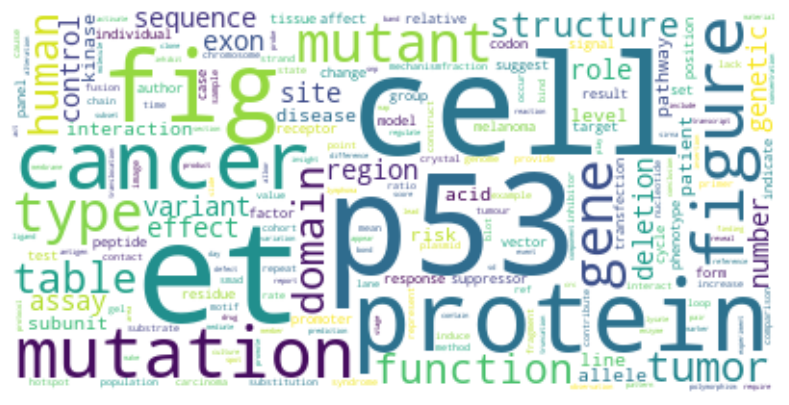

In [136]:
plot_wordCloud(df = trainData,Class = 1)

Word Cloud Visualization of Class 1

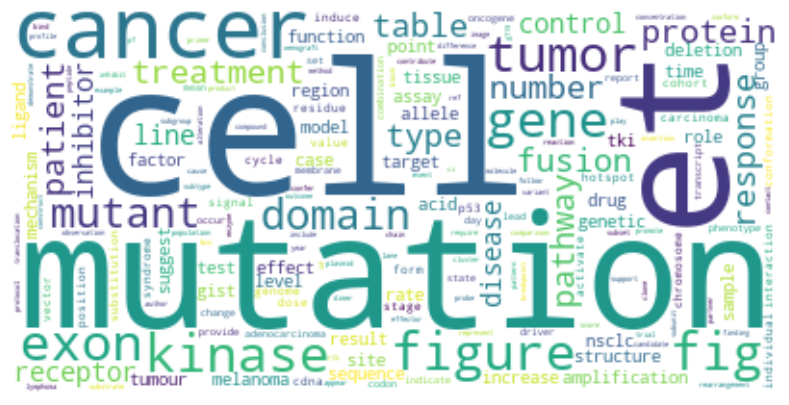

In [137]:
plot_wordCloud(df = trainData,Class = 2)

Word Cloud Visualization of Class 2

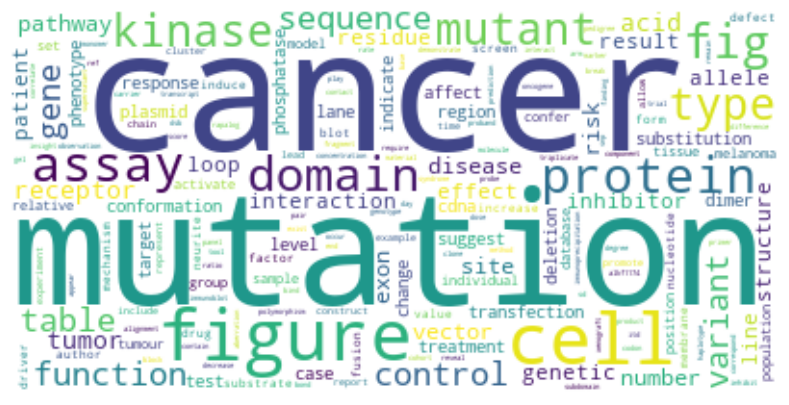

In [138]:
plot_wordCloud(df = trainData,Class = 3)

Word Cloud Visualization of Class 3

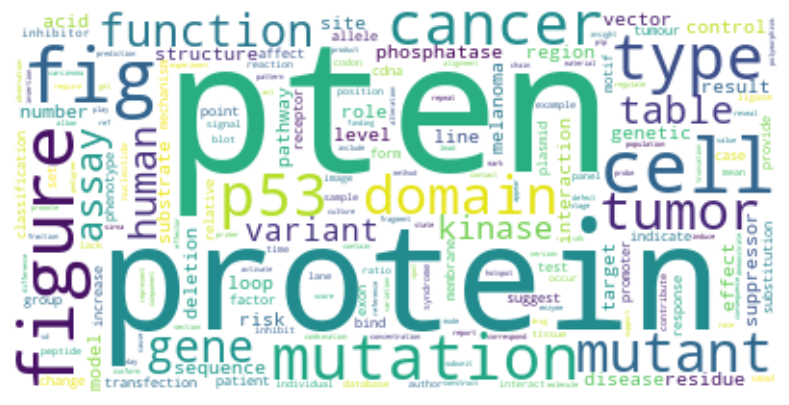

In [139]:
plot_wordCloud(df = trainData,Class = 4)

Word Cloud Visualization of Class 4

Text(0.5, 1.0, 'Count of Gene in Each Class')

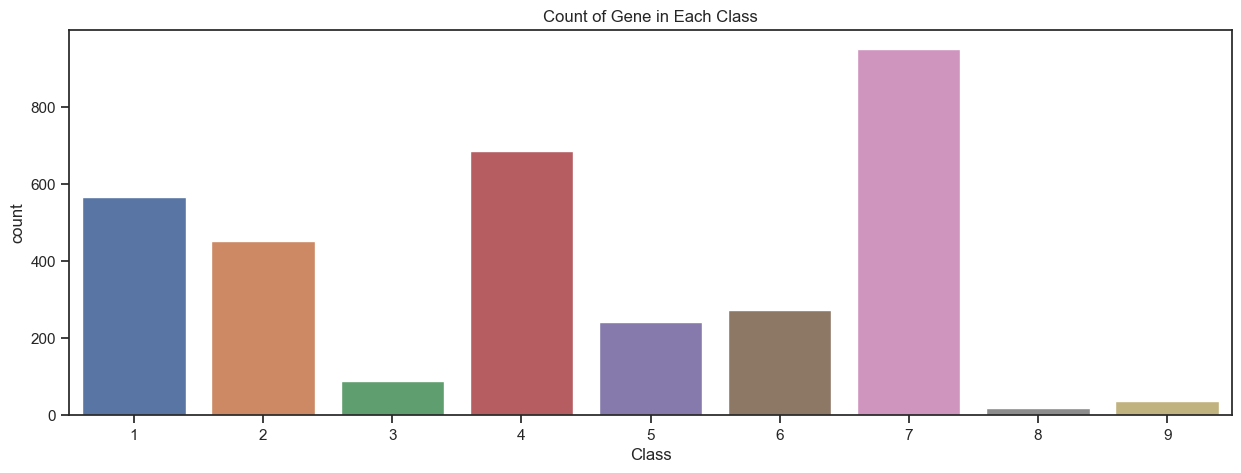

In [168]:
#visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,5))
sns.barplot(x = 'Class',y = 'count',data= df)
plt.title('Count of Gene in Each Class')

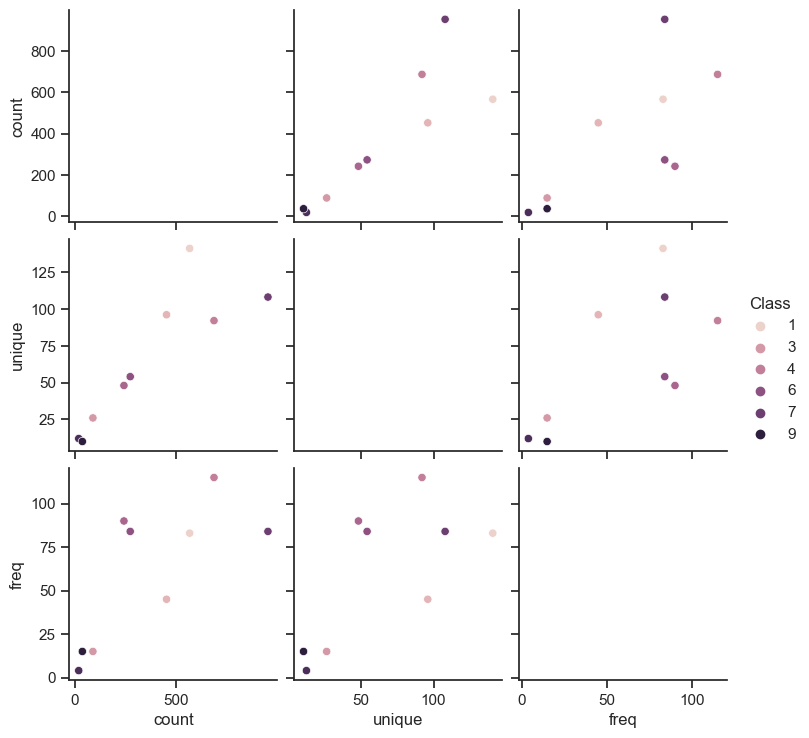

In [145]:
#sns.scatterplot(x = 'Class', y='count', data=df)

sns.set_theme(style="ticks")

sns.pairplot(df, hue="Class")


Pair plots of various variables

Text(0.5, 1.0, 'Histogram of Gene variable')

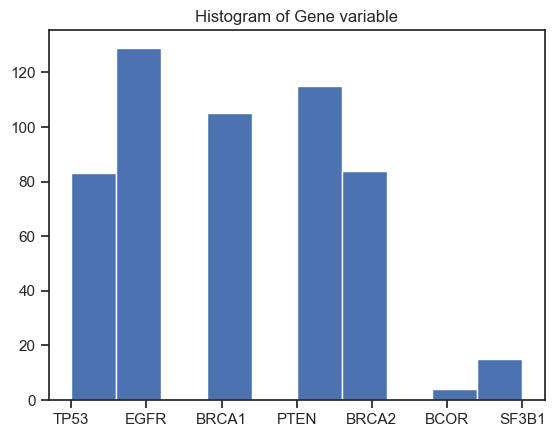

In [177]:
plt.hist(df["top"], weights= df["freq"])
#plt.hist(trainData["Gene"])
#plt.xticks(rotation=90)
plt.title("Histogram of Gene variable")

Text(0.5, 1.0, 'Pie Chart of Class variable')

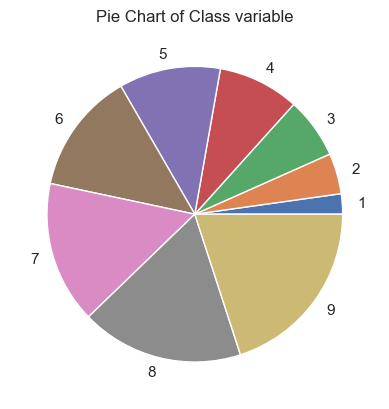

In [142]:
plt.pie(df["Class"], labels= df["Class"])
plt.title("Pie Chart of Class variable")

Text(0.5, 1.0, 'Count Plot for Class')

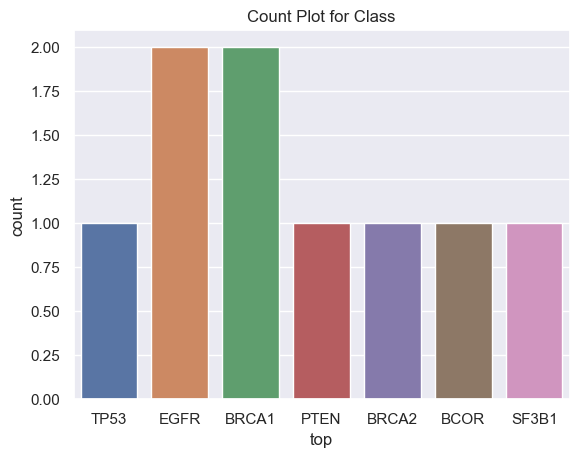

In [96]:
sns.countplot(x='top',data=df)
plt.title("Count Plot for Class")

Text(0.5, 1.0, 'Box plot showing distribution for Class')

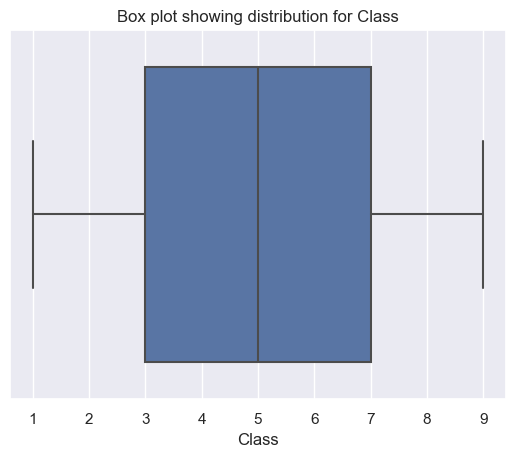

In [77]:
sns.boxplot(x="Class", data=df)
plt.title("Box plot showing distribution for Class")

Text(0.5, 1.0, 'Box plot showing distribution for Class and count')

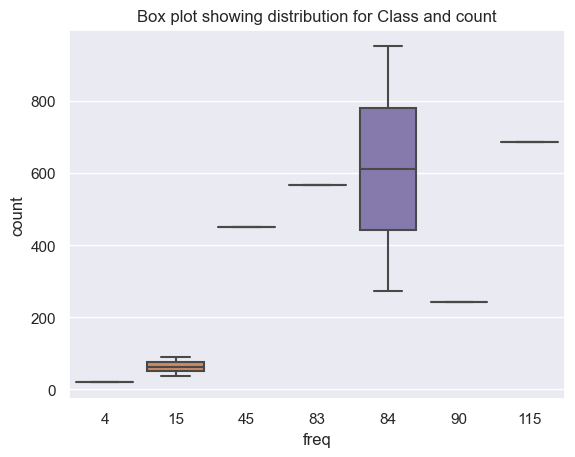

In [81]:
sns.boxplot(x="freq", y="count", data=df)
plt.title("Box plot showing distribution for Class and count")

Text(0.5, 1.0, 'Joint plot of CLass and Count')

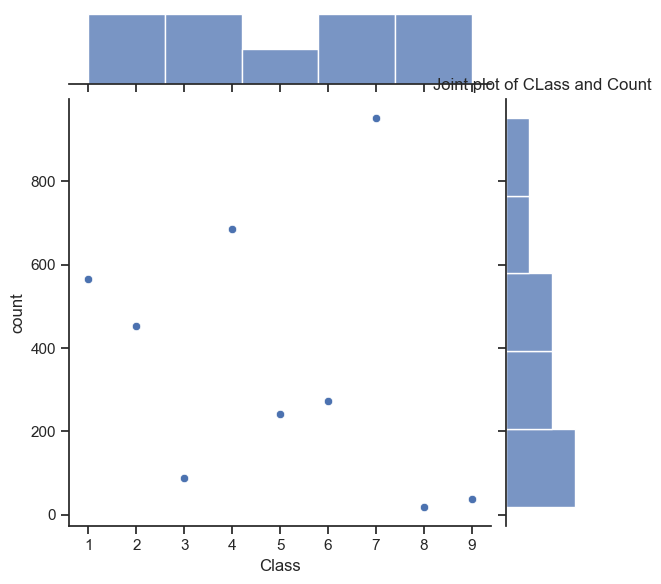

In [146]:
sns.jointplot(x='Class', y='count', data=df, kind='scatter')
plt.title("Joint plot of CLass and Count")

/Users/manasak/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution plot of Frequency variable')

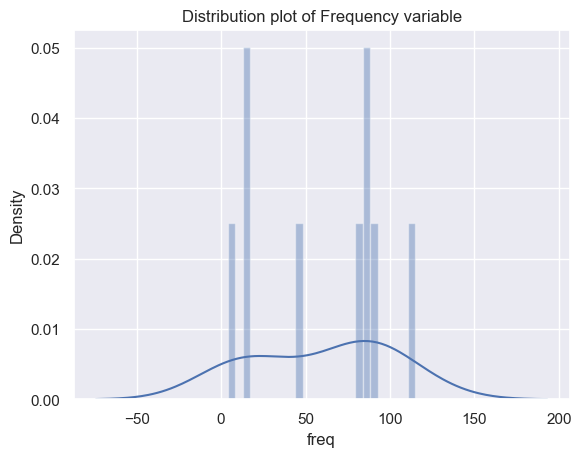

In [143]:
sns.distplot(df['freq'],bins=25, kde=True)
plt.title("Distribution plot of Frequency variable")

Text(0.5, 1.0, 'Scatter plot Grid')

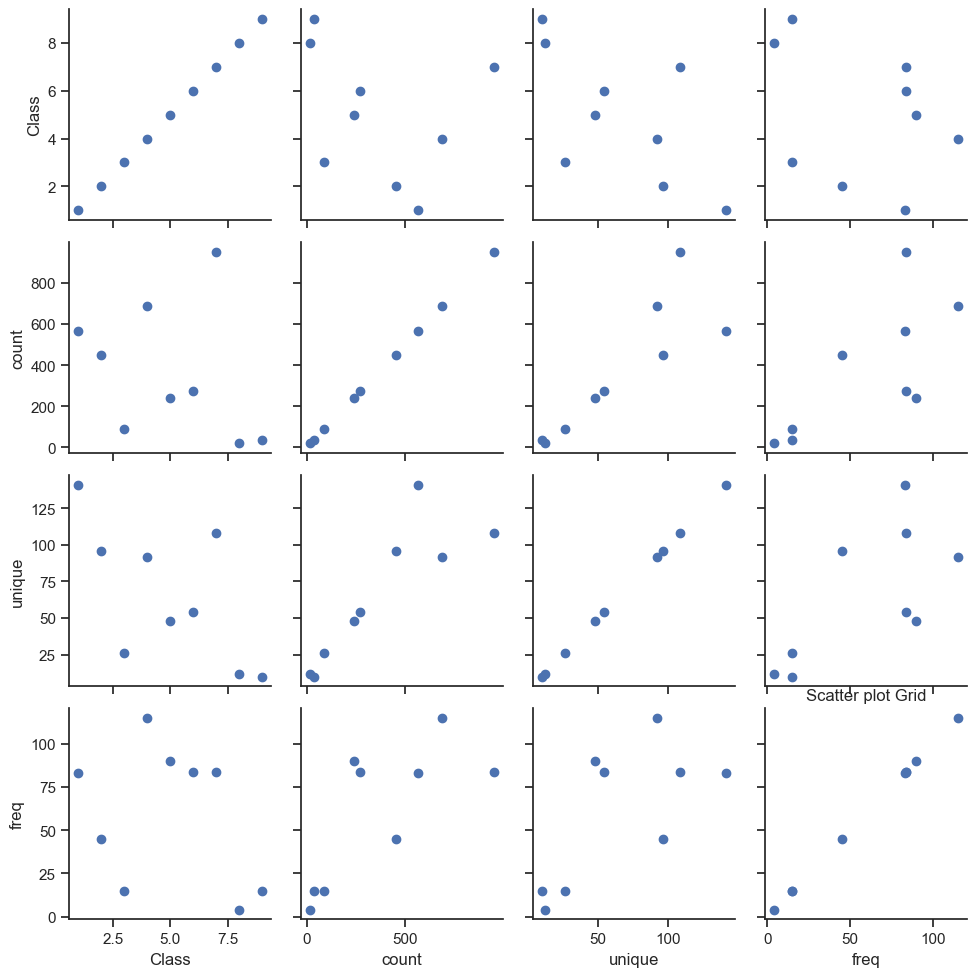

In [147]:
grids=sns.PairGrid(df)
grids.map(plt.scatter)
plt.title("Scatter plot Grid")